In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df=pd.read_csv("website_data.csv",header=1)

In [5]:
df.sample(5)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1567,Organic Search,2024042123,42,53,27,35.54717,0.642857,3.320755,0.509434,176
476,Organic Social,2024050117,71,88,52,59.62500,0.732394,5.488636,0.590909,483
2219,Organic Search,2024050101,24,30,18,27.90000,0.750000,4.200000,0.600000,126
2806,Unassigned,2024042814,2,2,0,99.50000,0.000000,4.500000,0.000000,9
3170,Organic Video,2024050121,0,1,0,0.00000,0.000000,2.000000,0.000000,2


In [6]:
df.columns

Index(['Session primary channel group (Default channel group)',
       'Date + hour (YYYYMMDDHH)', 'Users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count'],
      dtype='object')

In [7]:
df.rename(columns={
    'Session primary channel group (Default channel group)': 'channel_group',
    'Date + hour (YYYYMMDDHH)': 'datetime',
    'Users': 'users',
    'Sessions': 'sessions',
    'Engaged sessions': 'engaged_sessions',
    'Average engagement time per session': 'avg_engagement_time',
    'Engaged sessions per user': 'engaged_sessions_per_user',
    'Events per session': 'events_per_session',
    'Engagement rate': 'engagement_rate',
    'Event count': 'event_count'
}, inplace=True)

In [8]:
df.sample(3)

,channel_group,datetime,users,sessions,engaged_sessions,avg_engagement_time,engaged_sessions_per_user,events_per_session,engagement_rate,event_count
373,Organic Social,2024042718,75,102,43,25.843137,0.573333,3.911765,0.421569,399
1447,Direct,2024041207,44,50,26,83.200000,0.590909,3.820000,0.520000,191
777,Organic Search,2024041412,60,66,40,36.378788,0.666667,4.227273,0.606061,279


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   channel_group              3182 non-null   object 
 1   datetime                   3182 non-null   int64  
 2   users                      3182 non-null   int64  
 3   sessions                   3182 non-null   int64  
 4   engaged_sessions           3182 non-null   int64  
 5   avg_engagement_time        3182 non-null   float64
 6   engaged_sessions_per_user  3182 non-null   float64
 7   events_per_session         3182 non-null   float64
 8   engagement_rate            3182 non-null   float64
 9   event_count                3182 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 248.7+ KB


In [11]:
df['datetime']=pd.to_datetime(df['datetime'],format="%Y%m%d%H")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   channel_group              3182 non-null   object        
 1   datetime                   3182 non-null   datetime64[ns]
 2   users                      3182 non-null   int64         
 3   sessions                   3182 non-null   int64         
 4   engaged_sessions           3182 non-null   int64         
 5   avg_engagement_time        3182 non-null   float64       
 6   engaged_sessions_per_user  3182 non-null   float64       
 7   events_per_session         3182 non-null   float64       
 8   engagement_rate            3182 non-null   float64       
 9   event_count                3182 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 248.7+ KB


In [18]:
df['hour']=df['datetime'].dt.hour

In [28]:
df.isnull().sum()

channel_group                0
datetime                     0
users                        0
sessions                     0
engaged_sessions             0
avg_engagement_time          0
engaged_sessions_per_user    0
events_per_session           0
engagement_rate              0
event_count                  0
hour                         0
dtype: int64

<Axes: >

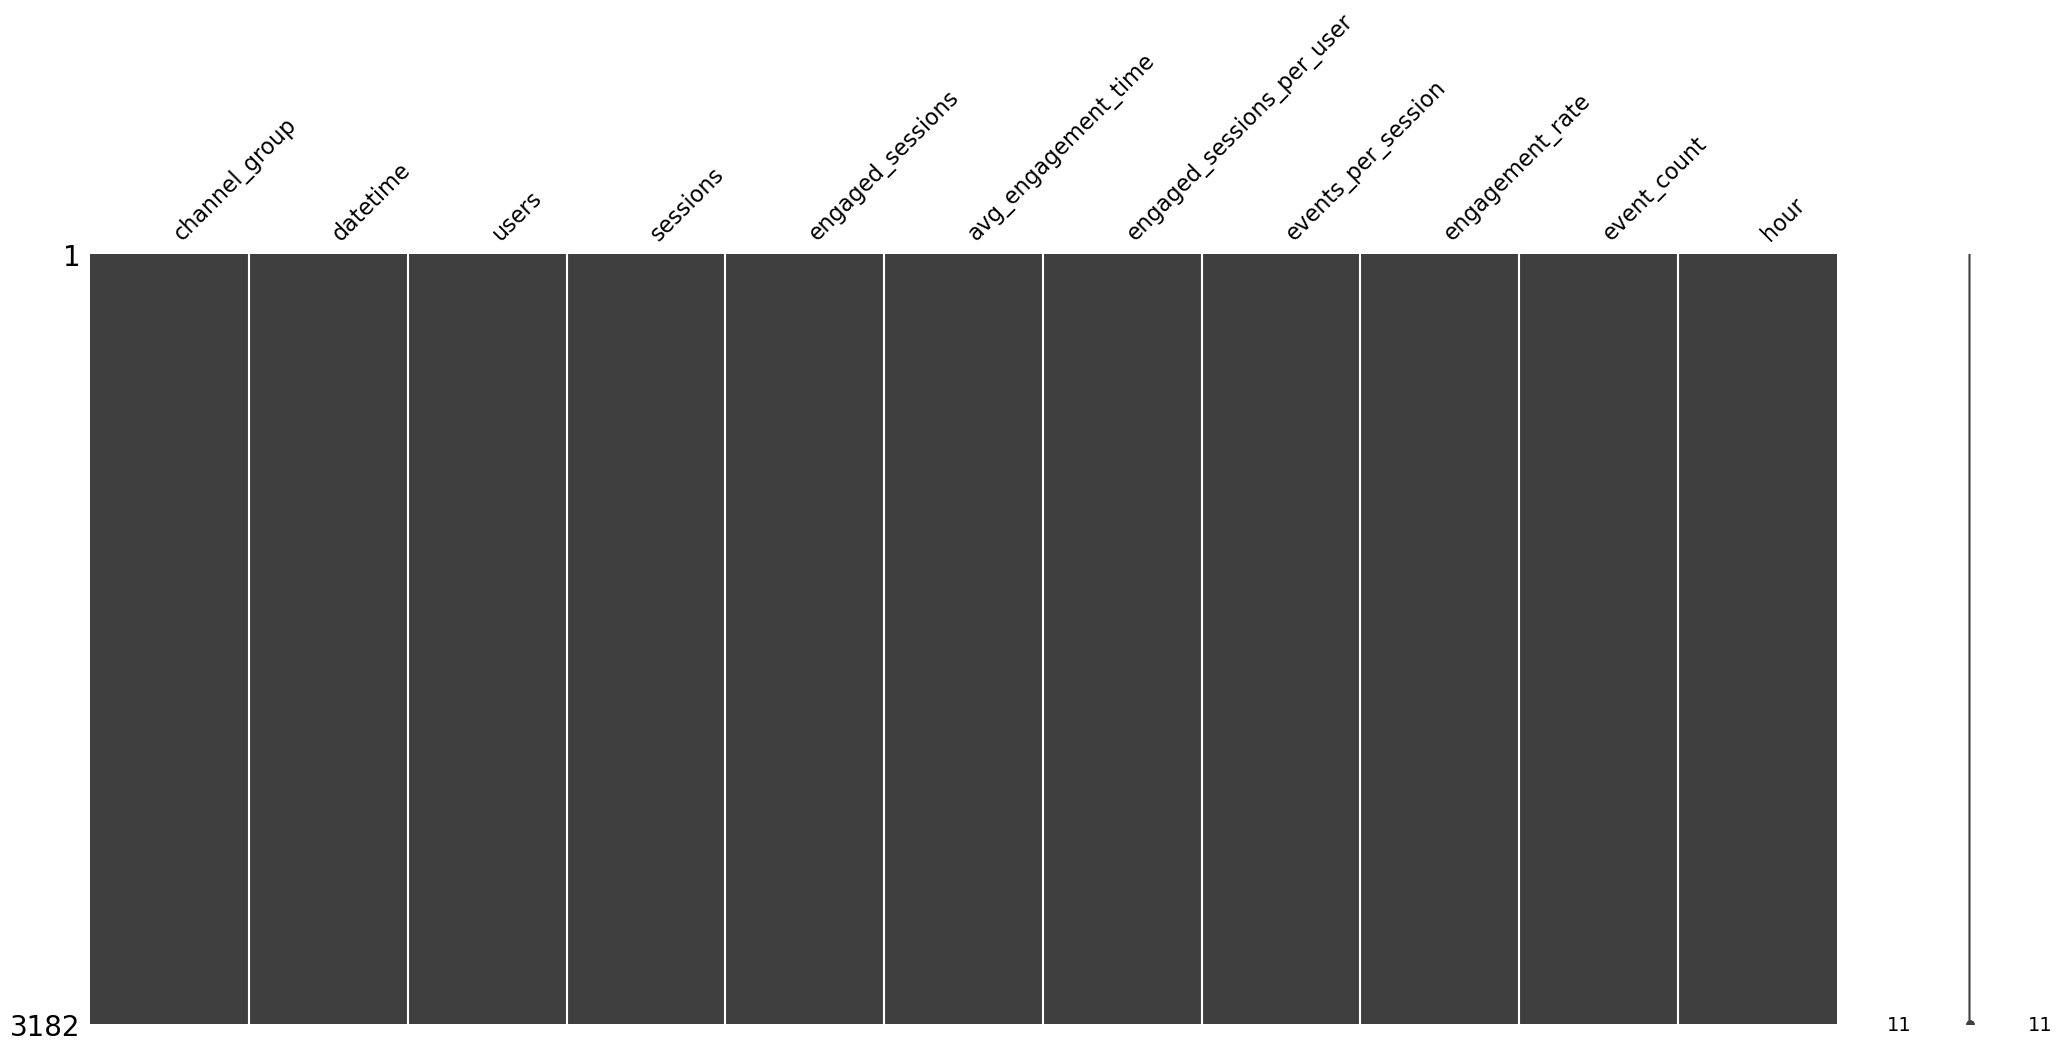

In [33]:
import missingno as msno
msno.matrix(df)


In [29]:
df.duplicated().sum()

0

In [32]:
df.describe()

,datetime,users,sessions,engaged_sessions,avg_engagement_time,engaged_sessions_per_user,events_per_session,engagement_rate,event_count,hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [46]:
df.sample(2)

,channel_group,datetime,users,sessions,engaged_sessions,avg_engagement_time,engaged_sessions_per_user,events_per_session,engagement_rate,event_count,hour
3014,Unassigned,2024-04-14 21:00:00,1,1,0,48.000000,0.000000,3.000000,0.000000,3,21
278,Organic Social,2024-04-16 19:00:00,81,102,57,59.205882,0.703704,5.715686,0.558824,583,19


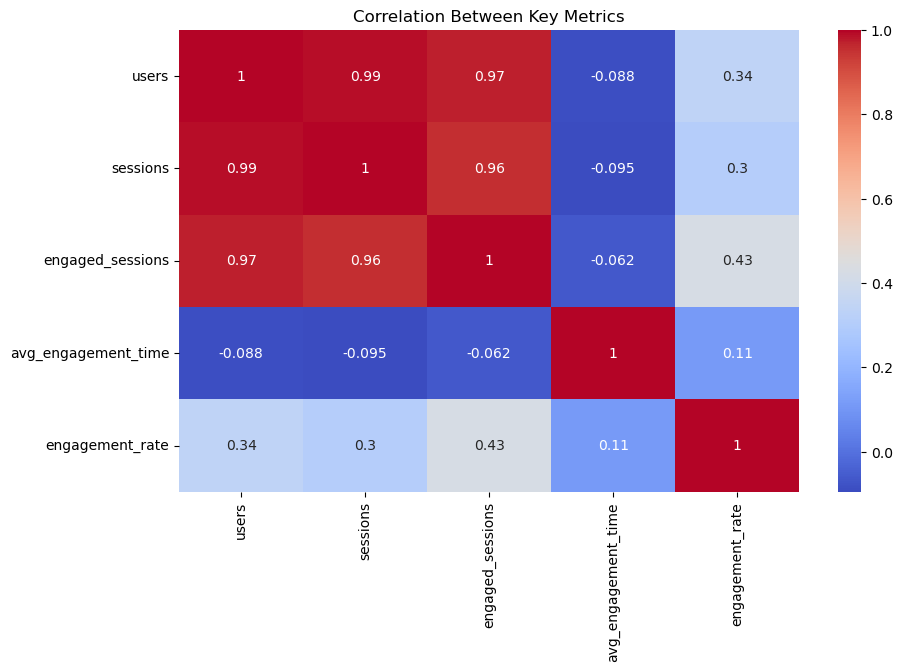

In [85]:
plt.figure(figsize=(10, 6))
corr = df[["users", "sessions", "engaged_sessions", "avg_engagement_time", "engagement_rate"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Key Metrics")
plt.show()


In [47]:
df.groupby('channel_group')["users"].sum()

channel_group
Direct            30042
Email                 2
Organic Search    28387
Organic Social    47572
Organic Video       123
Referral          26774
Unassigned          540
Name: users, dtype: int64

Channel Group Vs Users


In [60]:
# Group and sum users by channel_group
channel_data = df.groupby('channel_group')["users"].sum().reset_index()

# Create bar chart
fig = px.bar(
    channel_data,
    x='channel_group',
    y='users',
    title='Total Users by Channel Group',
    labels={'channel_group': 'Channel Group', 'users': 'Total Users'},
    text='users',
    color='channel_group'
)

# Update layout for better visuals
fig.update_layout(xaxis_tickangle=-75, showlegend=False)
fig.show()


Channel VS Average Engagement Time

In [69]:

# Group and compute mean, then round to 2 decimal places
engagement_data = df.groupby("channel_group")["avg_engagement_time"].mean().round(2).reset_index()

# Create bar chart with formatted labels
fig = px.bar(
    engagement_data,
    x="channel_group",
    y="avg_engagement_time",
    title="Average Engagement Time per Channel Group",
    labels=["channel_group"],
    text=engagement_data["avg_engagement_time"].astype(str)
)

# Improve layout
fig.update_layout(xaxis_tickangle=-45, showlegend=False)
fig.show()


In [74]:
# Group by channel group and get total users and average engagement rate
users_vs_engagement = df.groupby("channel_group")[["users", "engagement_rate"]].mean().round(2).reset_index()

# Create scatter plot
fig = px.scatter(
    users_vs_engagement,
    x="users",
    y="engagement_rate",
    size="users", 
    color="channel_group",
    hover_name="channel_group",
    title="Users vs. Engagement Rate by Channel Group",
    labels={
        "users": "Average Users",
        "engagement_rate": "Engagement Rate"
    }
)

fig.update_layout(showlegend=True)
fig.show()


Event Count Per Session

In [77]:
df["events_per_session"] = df["event_count"] / df["sessions"]
events_per_session_plot = df.groupby("channel_group")["events_per_session"].mean().round(2).reset_index().sort_values(by="events_per_session", ascending=False)

fig = px.bar(events_per_session_plot,
             x="channel_group",
             y="events_per_session",
             title="Avg Events per Session by Channel",
             color="channel_group",
             text="events_per_session")
fig.update_layout(showlegend=False, xaxis_tickangle=-45)
fig.show()


Engaged Sessions per User by Channel

In [78]:
engaged_sessions_plot = df.groupby("channel_group")["engaged_sessions_per_user"].mean().round(2).reset_index().sort_values(by="engaged_sessions_per_user", ascending=False)
fig = px.bar(engaged_sessions_plot,
             x="channel_group",
             y="engaged_sessions_per_user",
             title="Engaged Sessions per User by Channel",
             text="engaged_sessions_per_user",
             color="channel_group")
fig.update_layout(xaxis_tickangle=-45, showlegend=False)
fig.show()


Hourly Traffic Pattern

In [83]:

engagement_trend = df.resample("D")["engagement_rate"].mean().reset_index()

fig = px.line(engagement_trend, x="datetime", y="engagement_rate", 
              title="Average Engagement Rate Over Time")
fig.show()


Users And SEssion Over Time


In [86]:
import plotly.graph_objects as go

df_resampled = df.resample("D")[["users", "sessions"]].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_resampled["datetime"], y=df_resampled["users"],
                         mode='lines+markers', name='Users'))
fig.add_trace(go.Scatter(x=df_resampled["datetime"], y=df_resampled["sessions"],
                         mode='lines+markers', name='Sessions'))

fig.update_layout(title="Users and Sessions Over Time",
                  xaxis_title="Date", yaxis_title="Count",
                  hovermode="x unified")
fig.show()


Engaged Vs Non-Engaged Session

In [90]:
df["is_engaged"] = df["avg_engagement_time"] > 30  # You can change threshold
engagement_summary = df.groupby("is_engaged")["sessions"].sum().reset_index()
engagement_summary["label"] = engagement_summary["is_engaged"].map({True: "Engaged", False: "Non-Engaged"})

fig = px.pie(
    engagement_summary,
    names="label",
    values="sessions",
    title="Engaged vs Non-Engaged Sessions",
    hole=0.4
)
fig.update_traces(textinfo='percent+label')
fig.show()
